# Nesterov Plots

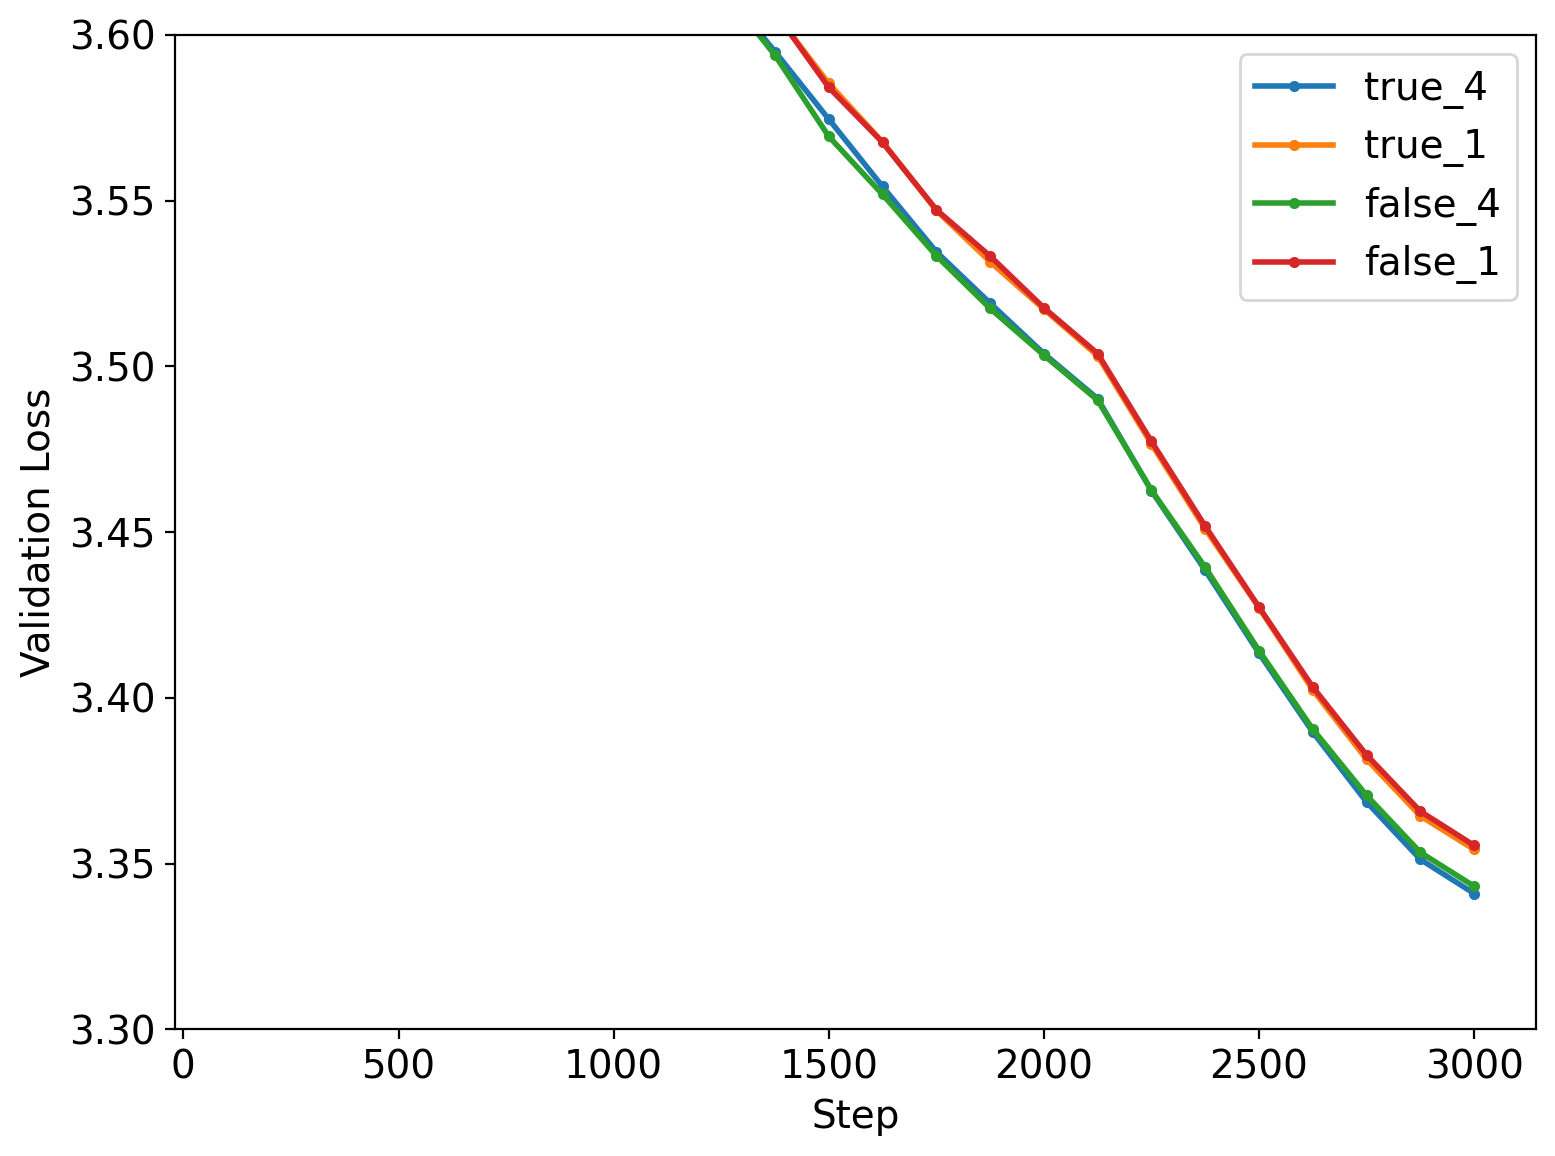

In [26]:
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Path setup
input_dir = "nesterov/"
output_dir = "nesterov/"
os.makedirs(output_dir, exist_ok=True)

# 2. Compile regex patterns for training and validation lines
pattern_val = re.compile(
    r"^step:(\d+)/(\d+)\s+val_loss:([\d.]+)\s+train_time:(\d+)ms\s+step_avg:([\d.]+)ms"
)

# 3. Find all *.log files in input_dir
log_files = glob.glob(os.path.join(input_dir, "*.log"))

# 4. Parse each log file and store DataFrames in a dict
#    Key = short label (e.g., filename without extension)
dfs = {}
for log_path in log_files:
    # Derive a label from the file name (customize as you like)
    label = os.path.splitext(os.path.basename(log_path))[0]

    # Read the file
    with open(log_path, "r") as f:
        lines = f.readlines()

    # Extract val_loss lines
    records = []
    for line in lines:
        line = line.strip()
        match_val = pattern_val.match(line)
        if match_val:
            step_current = int(match_val.group(1))
            # step_total = match_val.group(2)  # not used
            val_loss = float(match_val.group(3))
            # train_time = float(match_val.group(4))
            # step_avg   = float(match_val.group(5))

            records.append({"step": step_current, "val_loss": val_loss})

    # Convert to DataFrame, group by 'step' in case duplicates exist
    df = pd.DataFrame(records)
    if not df.empty:
        df = df.groupby("step").agg({"val_loss": "first"}).reset_index()

    if not df.empty:
        dfs[label] = df

# 5. Plotting
plt.figure(figsize=(8, 6), dpi=200)
plt.rcParams.update({"font.size": 14})

label_map = {
    "true_1": "True (power_iters=1)",
    "false_1": "False (power_iters=1)",
    "true_4": "True (power_iters=4)",
    "false_4": "False (power_iters=4)",
}


for label, df in dfs.items():
    display_label = label_map.get(label, label)
    plt.plot(
        df["step"],
        df["val_loss"],
        label=label,
        # 3. Customizable line/marker style:
        marker="o",  # 'o' gives little dots on data points
        linestyle="-",  # change to '--', '-.', ':' or '' as you wish
        # color='blue',    # specify a color if you want; e.g. 'red', 'green', '#123456'
        markersize=3,  # adjust dot size
    )

plt.xlabel("Step")
plt.ylabel("Validation Loss")
# plt.title("Validation Loss Across Different Log Files")
plt.legend()
plt.ylim(3.3, 3.6)  # 5. Set y-limit
plt.tight_layout()

plot_path = os.path.join(output_dir, "nesterov.pdf")
plt.savefig(plot_path, format="pdf")
plt.show()

# Sparsity

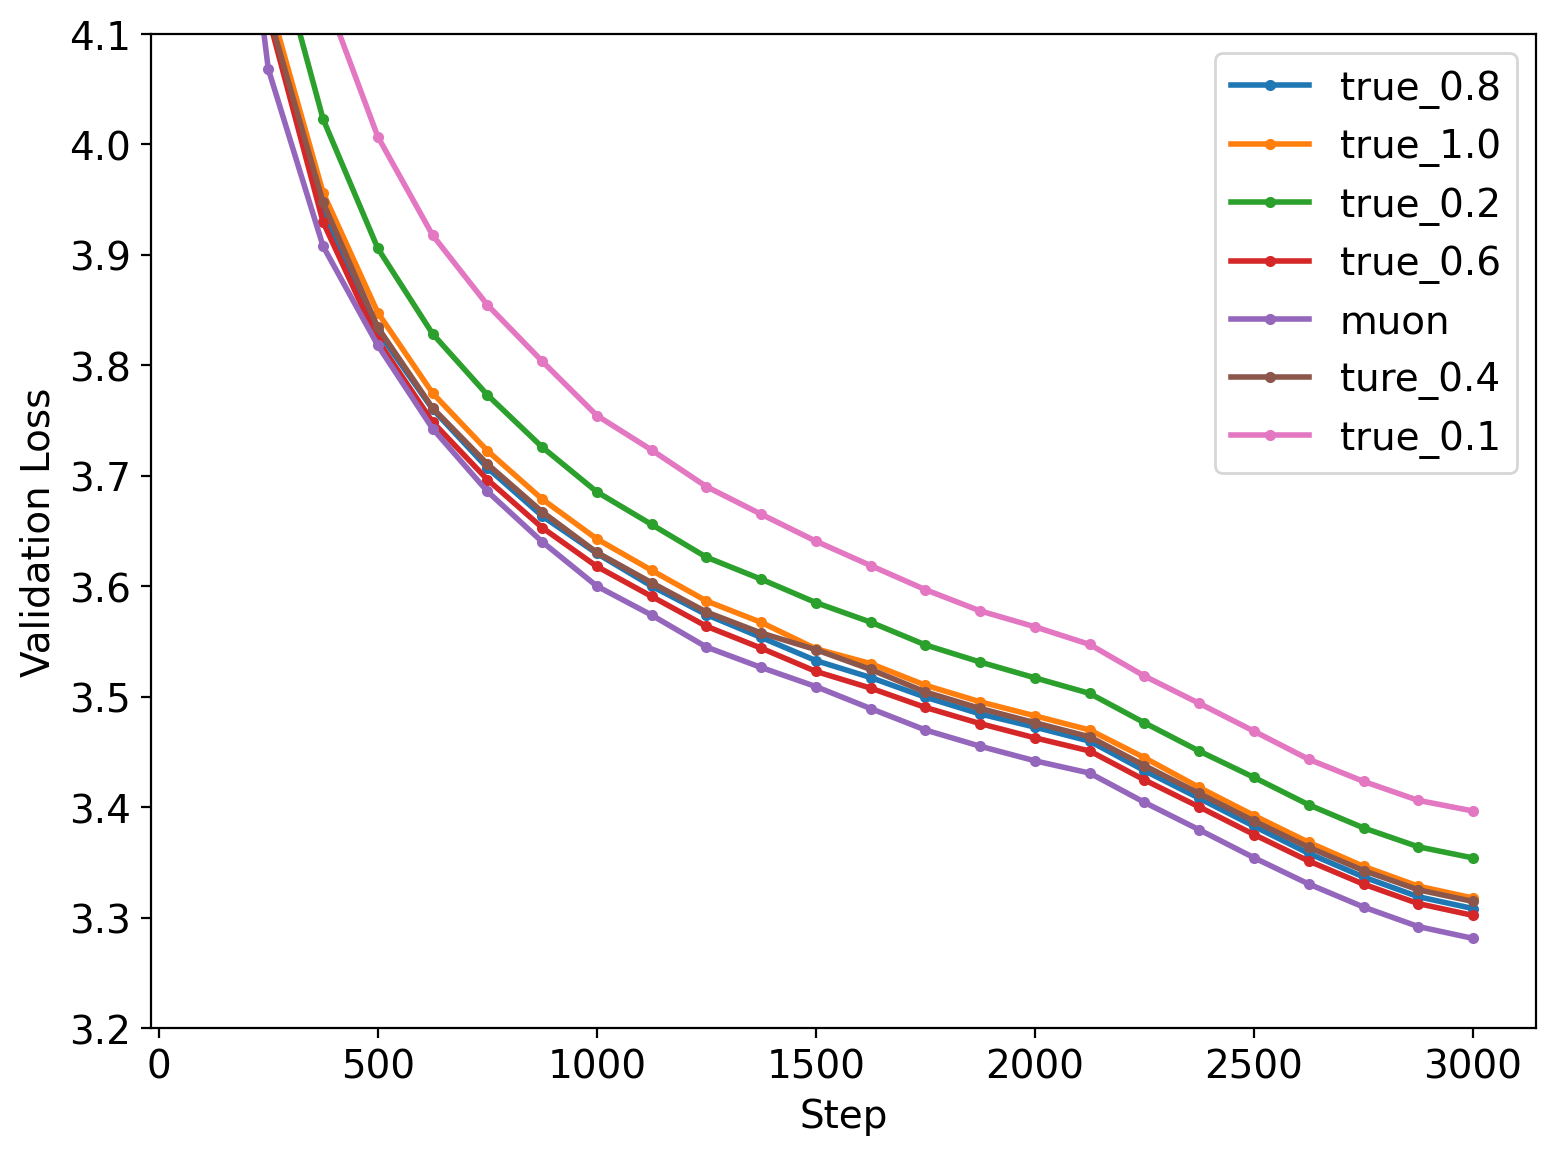

In [31]:
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Path setup
input_dir = "sparsity/"
output_dir = "sparsity/"
os.makedirs(output_dir, exist_ok=True)

# 2. Compile regex patterns for training and validation lines
pattern_val = re.compile(
    r"^step:(\d+)/(\d+)\s+val_loss:([\d.]+)\s+train_time:(\d+)ms\s+step_avg:([\d.]+)ms"
)

# 3. Find all *.log files in input_dir
log_files = glob.glob(os.path.join(input_dir, "*.log"))

# 4. Parse each log file and store DataFrames in a dict
#    Key = short label (e.g., filename without extension)
dfs = {}
for log_path in log_files:
    # Derive a label from the file name (customize as you like)
    label = os.path.splitext(os.path.basename(log_path))[0]

    # Read the file
    with open(log_path, "r") as f:
        lines = f.readlines()

    # Extract val_loss lines
    records = []
    for line in lines:
        line = line.strip()
        match_val = pattern_val.match(line)
        if match_val:
            step_current = int(match_val.group(1))
            # step_total = match_val.group(2)  # not used
            val_loss = float(match_val.group(3))
            # train_time = float(match_val.group(4))
            # step_avg   = float(match_val.group(5))

            records.append({"step": step_current, "val_loss": val_loss})

    # Convert to DataFrame, group by 'step' in case duplicates exist
    df = pd.DataFrame(records)
    if not df.empty:
        df = df.groupby("step").agg({"val_loss": "first"}).reset_index()

    if not df.empty:
        dfs[label] = df

# 5. Plotting
plt.figure(figsize=(8, 6), dpi=200)
plt.rcParams.update({"font.size": 14})

label_map = {
    "demon (2)": "DeMon (beta=1.5)",  # old_name: new_label
    "muon": "Muon (momentum=0.95)",
    "something_else": "Run 3 (svd approx)",
}


for label, df in dfs.items():
    plt.plot(
        df["step"],
        df["val_loss"],
        label=label,
        # 3. Customizable line/marker style:
        marker="o",  # 'o' gives little dots on data points
        linestyle="-",  # change to '--', '-.', ':' or '' as you wish
        # color='blue',    # specify a color if you want; e.g. 'red', 'green', '#123456'
        markersize=3,  # adjust dot size
    )

plt.xlabel("Step")
plt.ylabel("Validation Loss")
# plt.title("Validation Loss Across Different Log Files")
plt.legend()
plt.ylim(3.2, 4.1)  # 5. Set y-limit
plt.tight_layout()

plot_path = os.path.join(output_dir, "sparsity.pdf")
plt.savefig(plot_path, format="pdf")
plt.show()

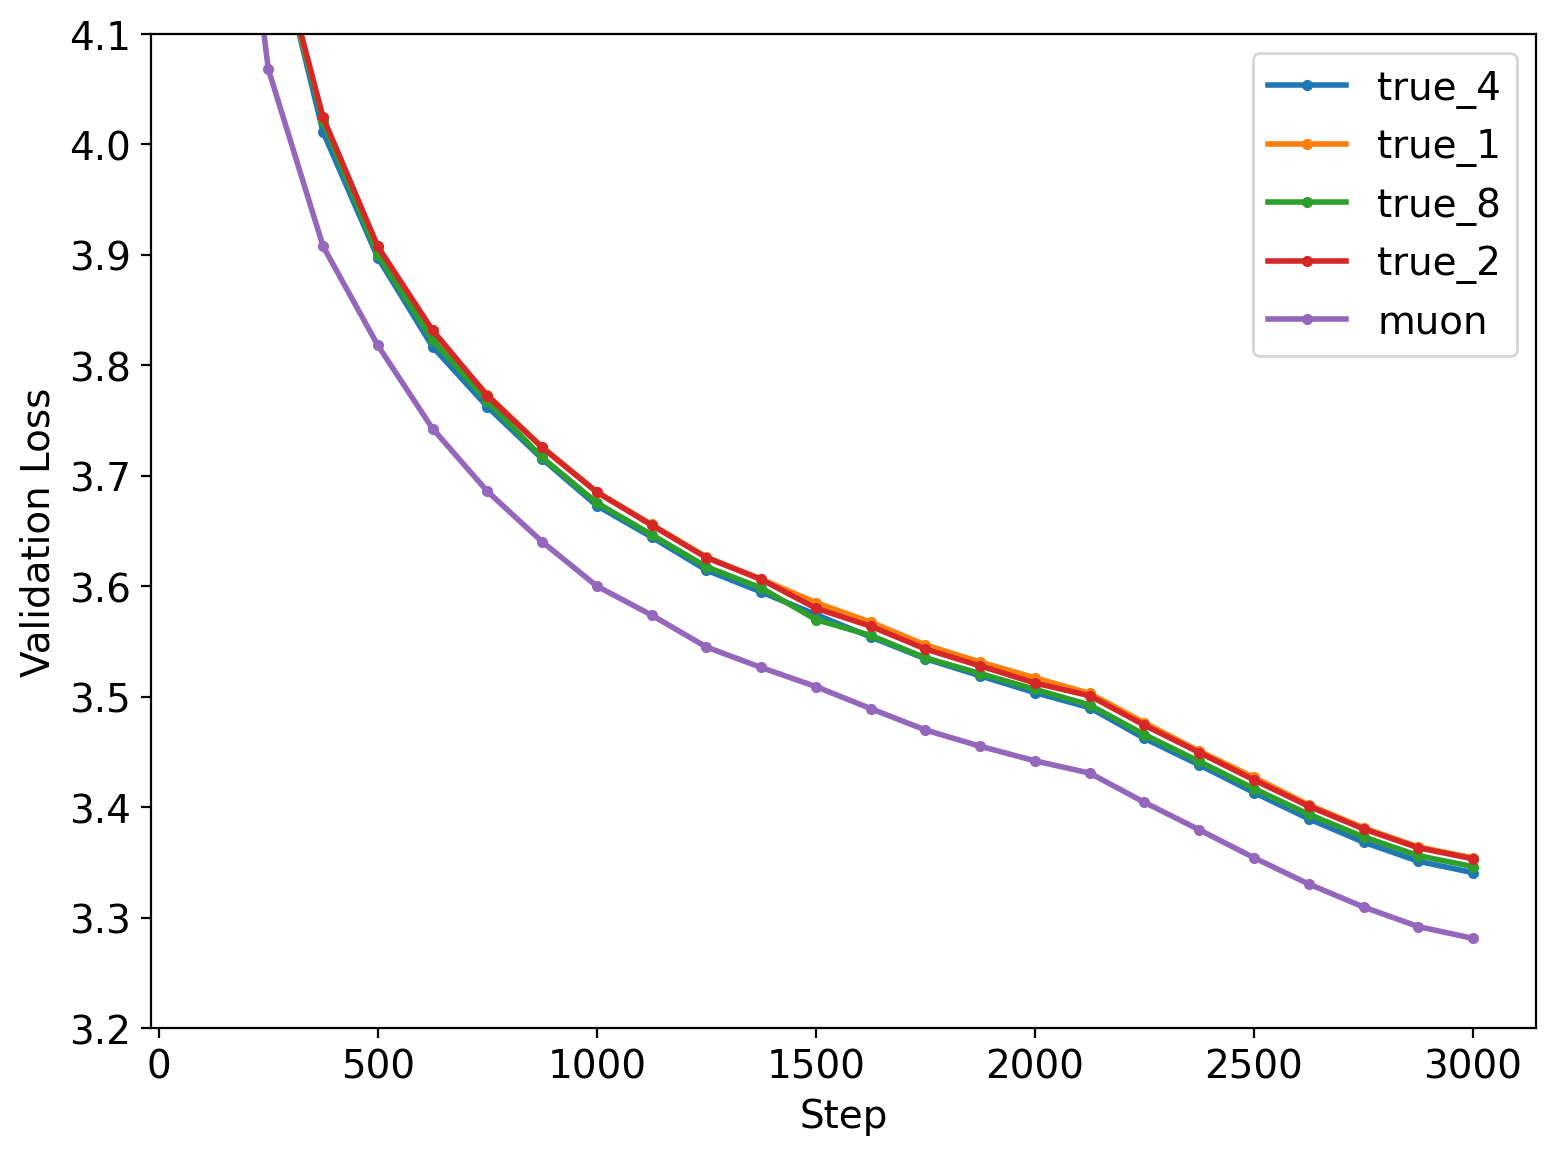

In [30]:
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Path setup
input_dir = "power/"
output_dir = "power/"
os.makedirs(output_dir, exist_ok=True)

# 2. Compile regex patterns for training and validation lines
pattern_val = re.compile(
    r"^step:(\d+)/(\d+)\s+val_loss:([\d.]+)\s+train_time:(\d+)ms\s+step_avg:([\d.]+)ms"
)

# 3. Find all *.log files in input_dir
log_files = glob.glob(os.path.join(input_dir, "*.log"))

# 4. Parse each log file and store DataFrames in a dict
#    Key = short label (e.g., filename without extension)
dfs = {}
for log_path in log_files:
    # Derive a label from the file name (customize as you like)
    label = os.path.splitext(os.path.basename(log_path))[0]

    # Read the file
    with open(log_path, "r") as f:
        lines = f.readlines()

    # Extract val_loss lines
    records = []
    for line in lines:
        line = line.strip()
        match_val = pattern_val.match(line)
        if match_val:
            step_current = int(match_val.group(1))
            # step_total = match_val.group(2)  # not used
            val_loss = float(match_val.group(3))
            # train_time = float(match_val.group(4))
            # step_avg   = float(match_val.group(5))

            records.append({"step": step_current, "val_loss": val_loss})

    # Convert to DataFrame, group by 'step' in case duplicates exist
    df = pd.DataFrame(records)
    if not df.empty:
        df = df.groupby("step").agg({"val_loss": "first"}).reset_index()

    if not df.empty:
        dfs[label] = df

# 5. Plotting
plt.figure(figsize=(8, 6), dpi=200)
plt.rcParams.update({"font.size": 14})

label_map = {
    "demon (2)": "DeMon (beta=1.5)",  # old_name: new_label
    "muon": "Muon (momentum=0.95)",
    "something_else": "Run 3 (svd approx)",
}


for label, df in dfs.items():
    plt.plot(
        df["step"],
        df["val_loss"],
        label=label,
        # 3. Customizable line/marker style:
        marker="o",  # 'o' gives little dots on data points
        linestyle="-",  # change to '--', '-.', ':' or '' as you wish
        # color='blue',    # specify a color if you want; e.g. 'red', 'green', '#123456'
        markersize=3,  # adjust dot size
    )

plt.xlabel("Step")
plt.ylabel("Validation Loss")
# plt.title("Validation Loss Across Different Log Files")
plt.legend()
plt.ylim(3.2, 4.1)  # 5. Set y-limit
plt.tight_layout()

plot_path = os.path.join(output_dir, "power.pdf")
plt.savefig(plot_path, format="pdf")
plt.show()

Gammas


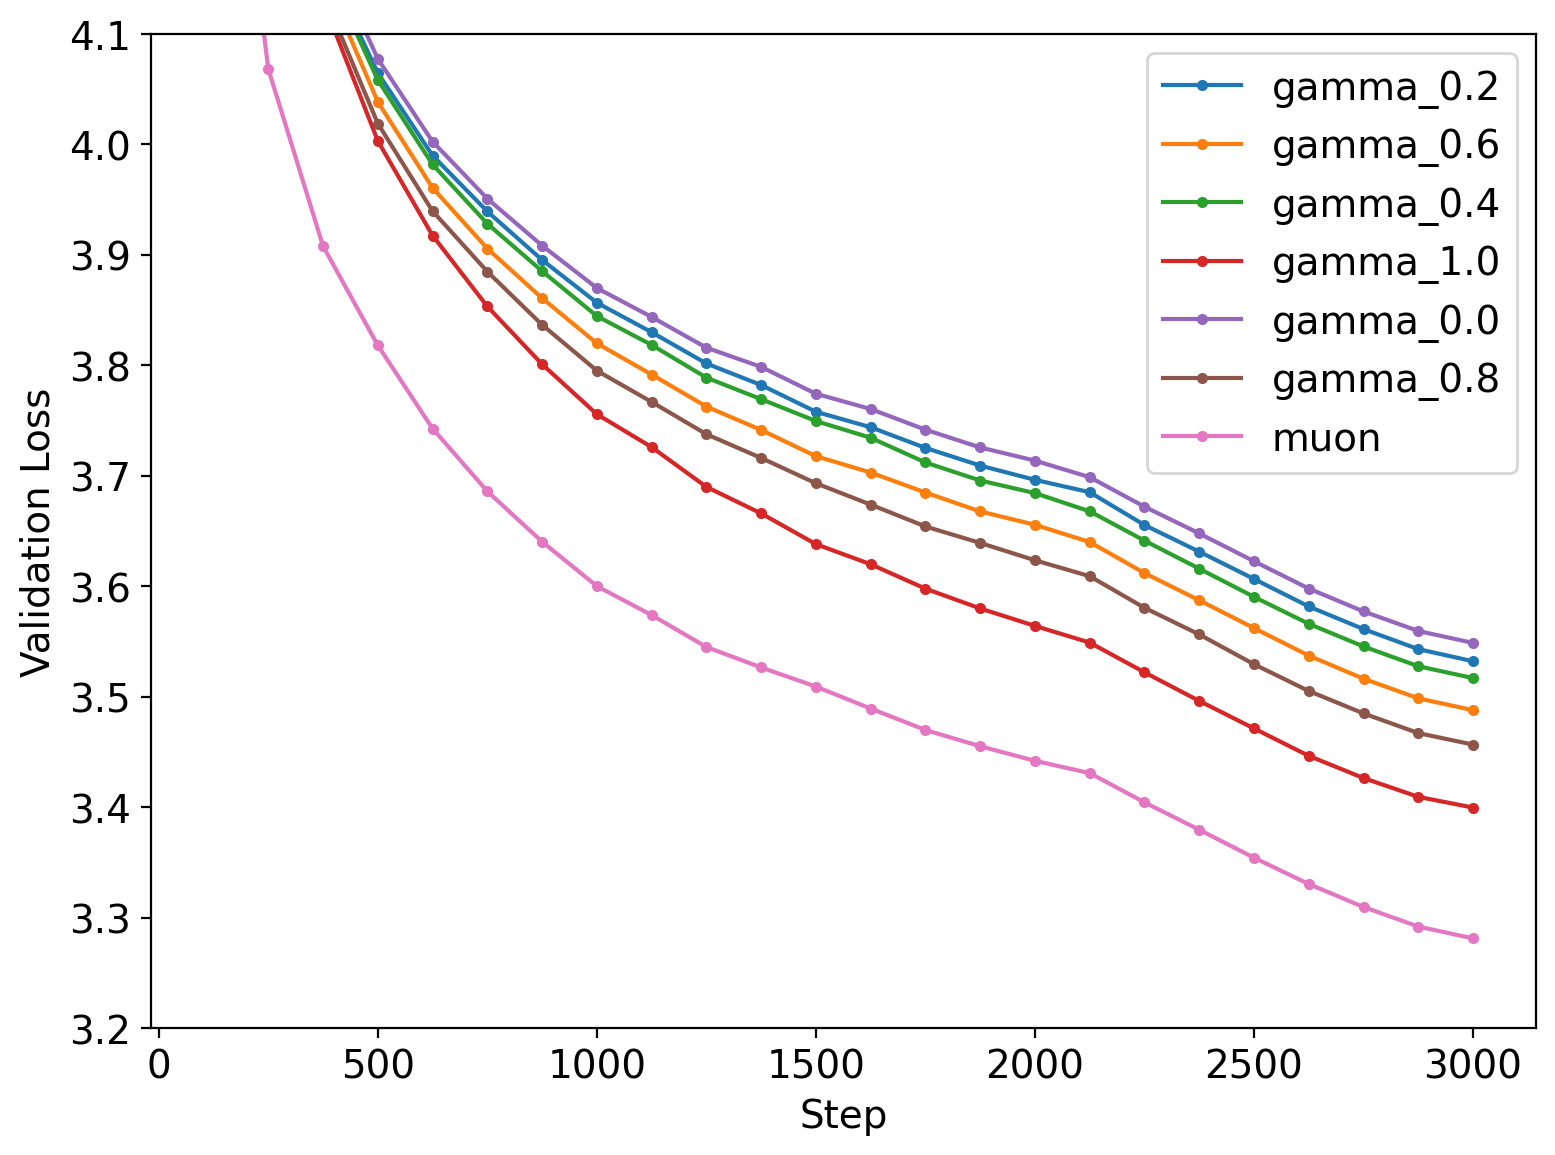

In [1]:
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Path setup
input_dir = "gamma/"
output_dir = "gamma/"
os.makedirs(output_dir, exist_ok=True)

# 2. Compile regex patterns for training and validation lines
pattern_val = re.compile(
    r"^step:(\d+)/(\d+)\s+val_loss:([\d.]+)\s+train_time:(\d+)ms\s+step_avg:([\d.]+)ms"
)

# 3. Find all *.log files in input_dir
log_files = glob.glob(os.path.join(input_dir, "*.log"))

# 4. Parse each log file and store DataFrames in a dict
#    Key = short label (e.g., filename without extension)
dfs = {}
for log_path in log_files:
    # Derive a label from the file name (customize as you like)
    label = os.path.splitext(os.path.basename(log_path))[0]

    # Read the file
    with open(log_path, "r") as f:
        lines = f.readlines()

    # Extract val_loss lines
    records = []
    for line in lines:
        line = line.strip()
        match_val = pattern_val.match(line)
        if match_val:
            step_current = int(match_val.group(1))
            # step_total = match_val.group(2)  # not used
            val_loss = float(match_val.group(3))
            # train_time = float(match_val.group(4))
            # step_avg   = float(match_val.group(5))

            records.append({"step": step_current, "val_loss": val_loss})

    # Convert to DataFrame, group by 'step' in case duplicates exist
    df = pd.DataFrame(records)
    if not df.empty:
        df = df.groupby("step").agg({"val_loss": "first"}).reset_index()

    if not df.empty:
        dfs[label] = df

# 5. Plotting
plt.figure(figsize=(8, 6), dpi=200)
plt.rcParams.update({"font.size": 14})

label_map = {
    "demon (2)": "DeMon (beta=1.5)",  # old_name: new_label
    "muon": "Muon (momentum=0.95)",
    "something_else": "Run 3 (svd approx)",
}


for label, df in dfs.items():
    plt.plot(
        df["step"],
        df["val_loss"],
        label=label,
        # 3. Customizable line/marker style:
        marker="o",  # 'o' gives little dots on data points
        linestyle="-",  # change to '--', '-.', ':' or '' as you wish
        # color='blue',    # specify a color if you want; e.g. 'red', 'green', '#123456'
        markersize=3,  # adjust dot size
    )

plt.xlabel("Step")
plt.ylabel("Validation Loss")
# plt.title("Validation Loss Across Different Log Files")
plt.legend()
plt.ylim(3.2, 4.1)  # 5. Set y-limit
plt.tight_layout()

plot_path = os.path.join(output_dir, "plot.pdf")
plt.savefig(plot_path, format="pdf")
plt.show()

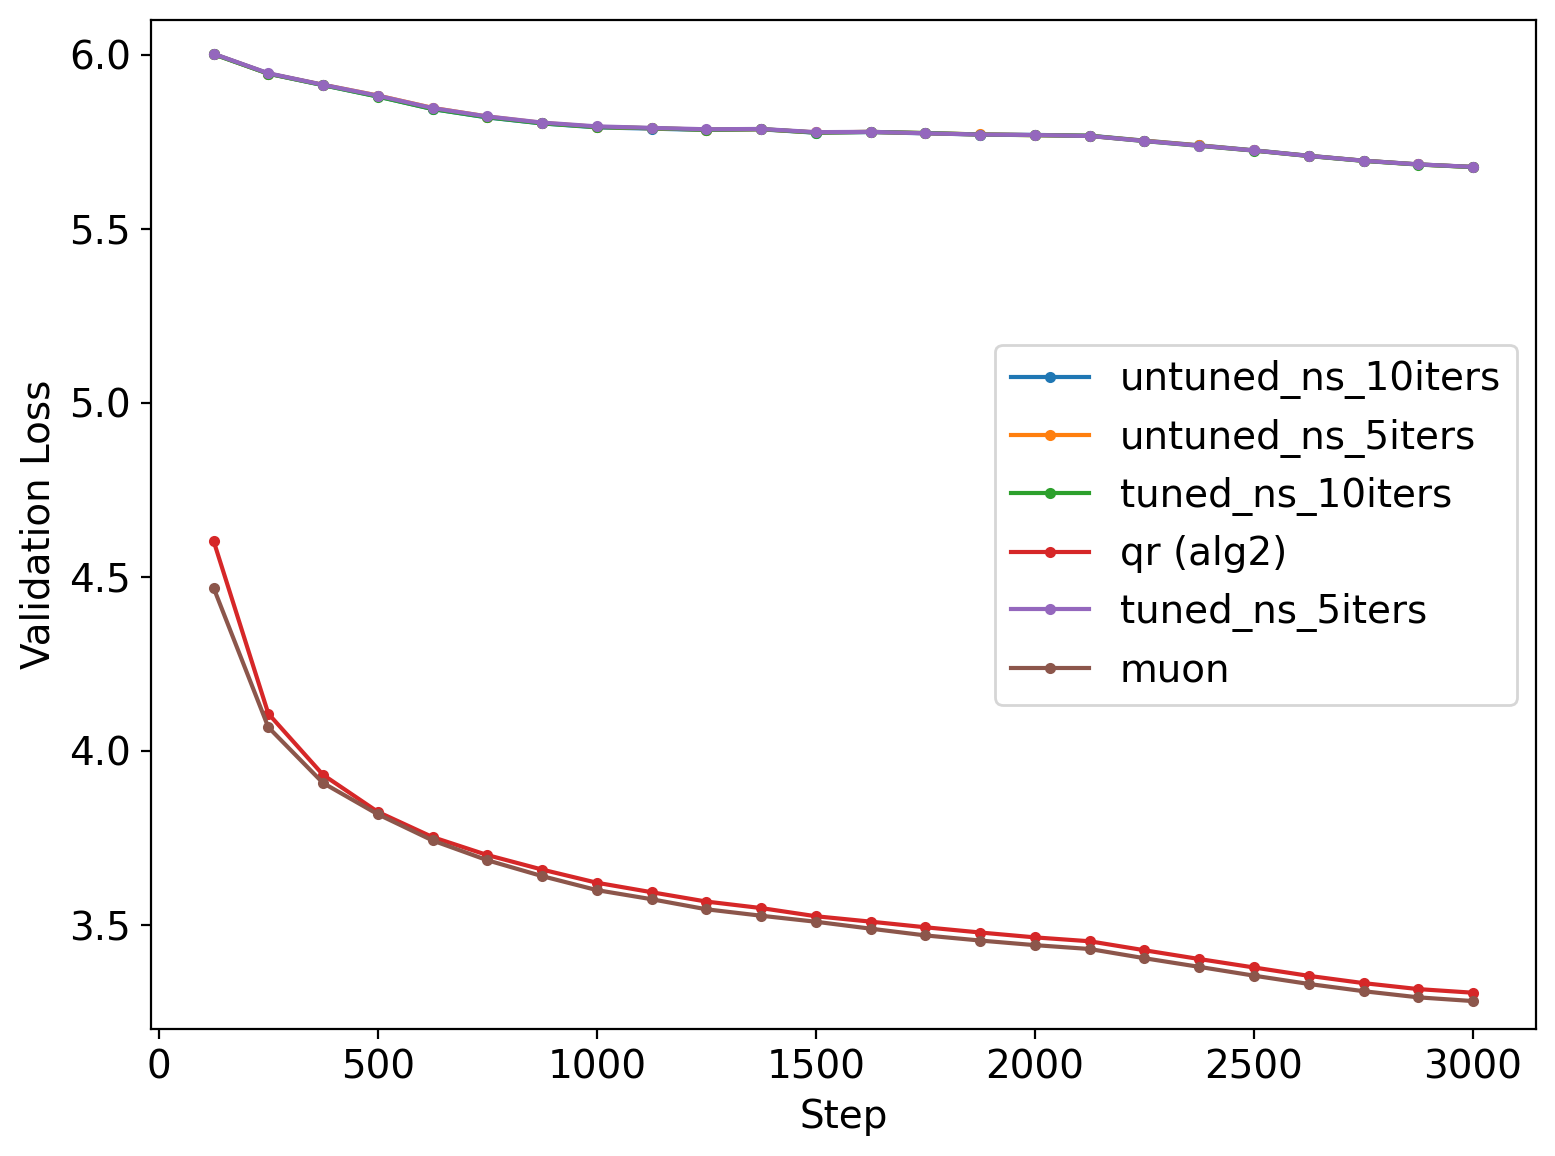

In [2]:
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Path setup
input_dir = "qr/"
output_dir = "qr/"
os.makedirs(output_dir, exist_ok=True)

# 2. Compile regex patterns for training and validation lines
pattern_val = re.compile(
    r"^step:(\d+)/(\d+)\s+val_loss:([\d.]+)\s+train_time:(\d+)ms\s+step_avg:([\d.]+)ms"
)

# 3. Find all *.log files in input_dir
log_files = glob.glob(os.path.join(input_dir, "*.log"))

# 4. Parse each log file and store DataFrames in a dict
#    Key = short label (e.g., filename without extension)
dfs = {}
for log_path in log_files:
    # Derive a label from the file name (customize as you like)
    label = os.path.splitext(os.path.basename(log_path))[0]

    # Read the file
    with open(log_path, "r") as f:
        lines = f.readlines()

    # Extract val_loss lines
    records = []
    for line in lines:
        line = line.strip()
        match_val = pattern_val.match(line)
        if match_val:
            step_current = int(match_val.group(1))
            # step_total = match_val.group(2)  # not used
            val_loss = float(match_val.group(3))
            # train_time = float(match_val.group(4))
            # step_avg   = float(match_val.group(5))

            records.append({"step": step_current, "val_loss": val_loss})

    # Convert to DataFrame, group by 'step' in case duplicates exist
    df = pd.DataFrame(records)
    if not df.empty:
        df = df.groupby("step").agg({"val_loss": "first"}).reset_index()

    if not df.empty:
        dfs[label] = df

# 5. Plotting
plt.figure(figsize=(8, 6), dpi=200)
plt.rcParams.update({"font.size": 14})

label_map = {
    "demon (2)": "DeMon (beta=1.5)",  # old_name: new_label
    "muon": "Muon (momentum=0.95)",
    "something_else": "Run 3 (svd approx)",
}


for label, df in dfs.items():
    plt.plot(
        df["step"],
        df["val_loss"],
        label=label,
        # 3. Customizable line/marker style:
        marker="o",  # 'o' gives little dots on data points
        linestyle="-",  # change to '--', '-.', ':' or '' as you wish
        # color='blue',    # specify a color if you want; e.g. 'red', 'green', '#123456'
        markersize=3,  # adjust dot size
    )

plt.xlabel("Step")
plt.ylabel("Validation Loss")
# plt.title("Validation Loss Across Different Log Files")
plt.legend()
plt.ylim(3.2, 6.1)  # 5. Set y-limit
plt.tight_layout()

plot_path = os.path.join(output_dir, "plot.pdf")
plt.savefig(plot_path, format="pdf")
plt.show()

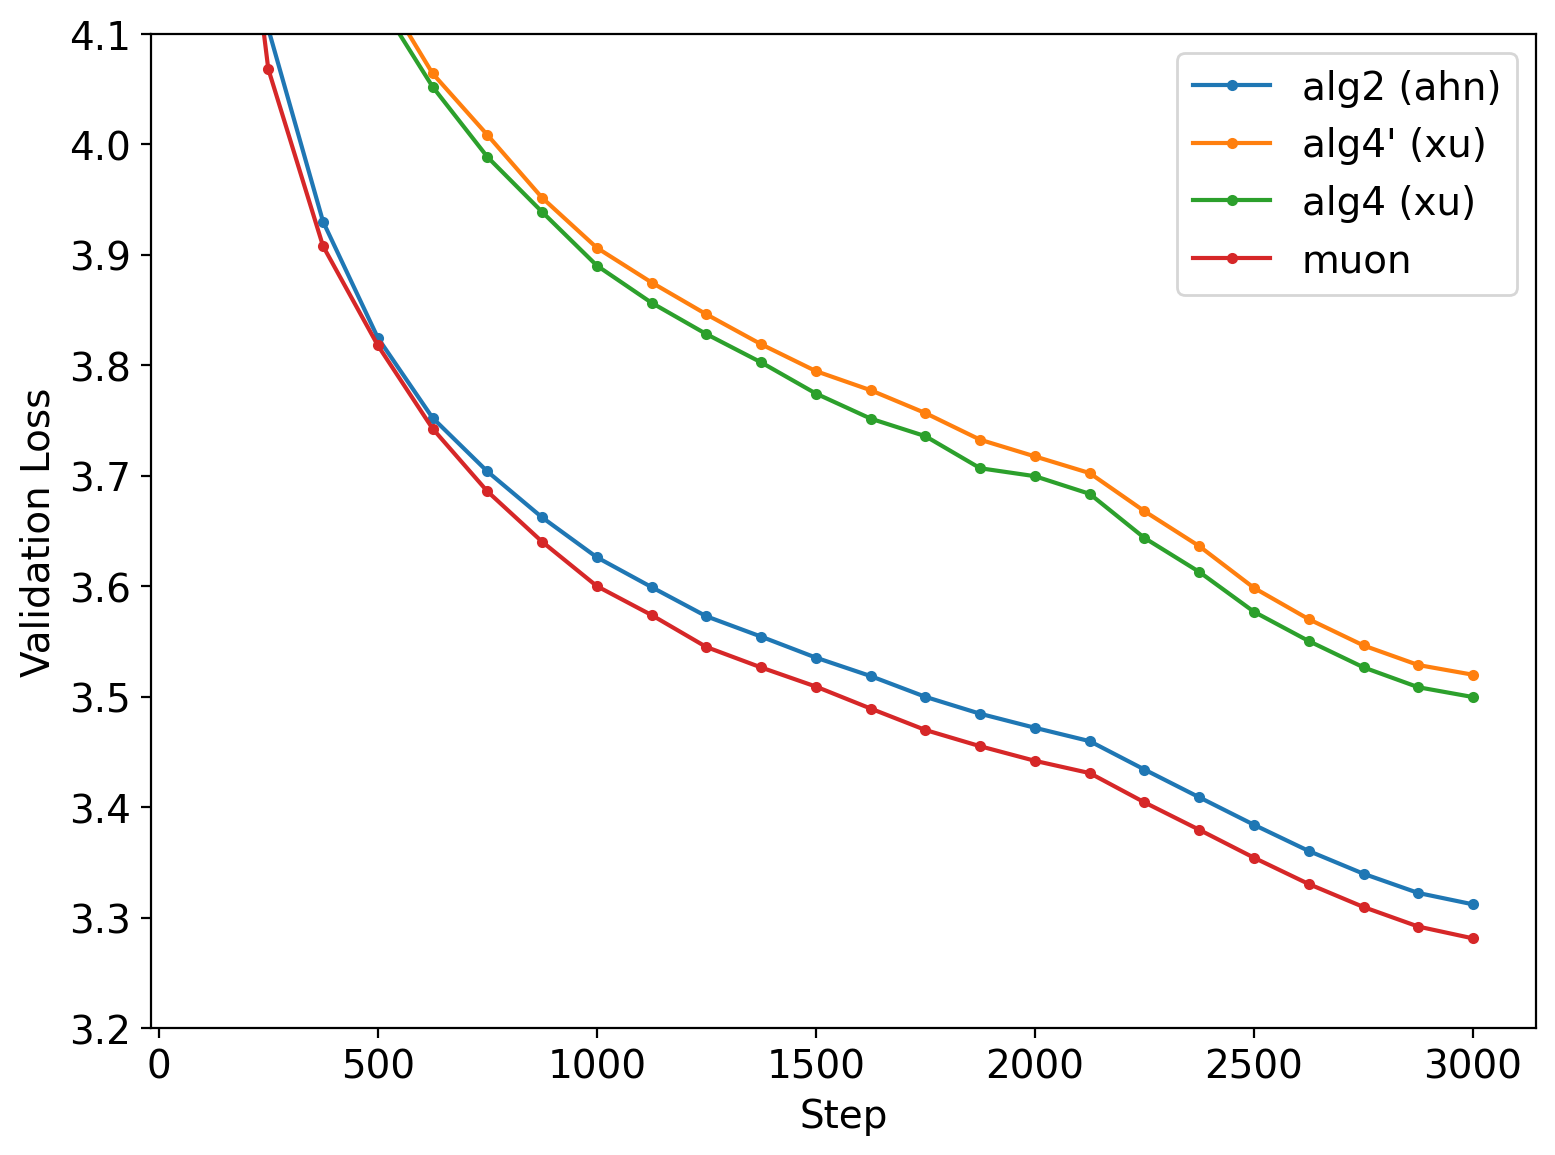

In [3]:
import os
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

# 1. Path setup
input_dir = "twoalgs/"
output_dir = "twoalgs/"
os.makedirs(output_dir, exist_ok=True)

# 2. Compile regex patterns for training and validation lines
pattern_val = re.compile(
    r"^step:(\d+)/(\d+)\s+val_loss:([\d.]+)\s+train_time:(\d+)ms\s+step_avg:([\d.]+)ms"
)

# 3. Find all *.log files in input_dir
log_files = glob.glob(os.path.join(input_dir, "*.log"))

# 4. Parse each log file and store DataFrames in a dict
#    Key = short label (e.g., filename without extension)
dfs = {}
for log_path in log_files:
    # Derive a label from the file name (customize as you like)
    label = os.path.splitext(os.path.basename(log_path))[0]

    # Read the file
    with open(log_path, "r") as f:
        lines = f.readlines()

    # Extract val_loss lines
    records = []
    for line in lines:
        line = line.strip()
        match_val = pattern_val.match(line)
        if match_val:
            step_current = int(match_val.group(1))
            # step_total = match_val.group(2)  # not used
            val_loss = float(match_val.group(3))
            # train_time = float(match_val.group(4))
            # step_avg   = float(match_val.group(5))

            records.append({"step": step_current, "val_loss": val_loss})

    # Convert to DataFrame, group by 'step' in case duplicates exist
    df = pd.DataFrame(records)
    if not df.empty:
        df = df.groupby("step").agg({"val_loss": "first"}).reset_index()

    if not df.empty:
        dfs[label] = df

# 5. Plotting
plt.figure(figsize=(8, 6), dpi=200)
plt.rcParams.update({"font.size": 14})

label_map = {
    "demon (2)": "DeMon (beta=1.5)",  # old_name: new_label
    "muon": "Muon (momentum=0.95)",
    "something_else": "Run 3 (svd approx)",
}


for label, df in dfs.items():
    plt.plot(
        df["step"],
        df["val_loss"],
        label=label,
        # 3. Customizable line/marker style:
        marker="o",  # 'o' gives little dots on data points
        linestyle="-",  # change to '--', '-.', ':' or '' as you wish
        # color='blue',    # specify a color if you want; e.g. 'red', 'green', '#123456'
        markersize=3,  # adjust dot size
    )

plt.xlabel("Step")
plt.ylabel("Validation Loss")
# plt.title("Validation Loss Across Different Log Files")
plt.legend()
plt.ylim(3.2, 4.1)  # 5. Set y-limit
plt.tight_layout()

plot_path = os.path.join(output_dir, "plot.pdf")
plt.savefig(plot_path, format="pdf")
plt.show()